# The purpose is to show the gunstryker

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[12])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['gs_1.fits',
 'gs_10.fits',
 'gs_100.fits',
 'gs_101.fits',
 'gs_102.fits',
 'gs_103.fits',
 'gs_104.fits',
 'gs_105.fits',
 'gs_106.fits',
 'gs_107.fits',
 'gs_108.fits',
 'gs_109.fits',
 'gs_11.fits',
 'gs_110.fits',
 'gs_111.fits',
 'gs_112.fits',
 'gs_113.fits',
 'gs_114.fits',
 'gs_115.fits',
 'gs_116.fits',
 'gs_117.fits',
 'gs_118.fits',
 'gs_119.fits',
 'gs_12.fits',
 'gs_120.fits',
 'gs_121.fits',
 'gs_122.fits',
 'gs_123.fits',
 'gs_124.fits',
 'gs_125.fits',
 'gs_126.fits',
 'gs_127.fits',
 'gs_128.fits',
 'gs_129.fits',
 'gs_13.fits',
 'gs_130.fits',
 'gs_131.fits',
 'gs_132.fits',
 'gs_133.fits',
 'gs_134.fits',
 'gs_135.fits',
 'gs_136.fits',
 'gs_137.fits',
 'gs_138.fits',
 'gs_139.fits',
 'gs_14.fits',
 'gs_140.fits',
 'gs_141.fits',
 'gs_142.fits',
 'gs_143.fits',
 'gs_144.fits',
 'gs_145.fits',
 'gs_146.fits',
 'gs_147.fits',
 'gs_148.fits',
 'gs_149.fits',
 'gs_15.fits',
 'gs_150.fits',
 'gs_151.fits',
 'gs_152.fits',
 'gs_153.fits',
 'gs_154.fits',
 'gs_155.fits',


In [14]:
fits_files.remove('gsspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [17]:
filelist[:5]

['gs_1.fits', 'gs_10.fits', 'gs_100.fits', 'gs_101.fits', 'gs_102.fits']

In [18]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^gs_([0-9].*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append('gs_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [19]:
print obj_names2

['gs_1', 'gs_10', 'gs_100', 'gs_101', 'gs_102', 'gs_103', 'gs_104', 'gs_105', 'gs_106', 'gs_107', 'gs_108', 'gs_109', 'gs_11', 'gs_110', 'gs_111', 'gs_112', 'gs_113', 'gs_114', 'gs_115', 'gs_116', 'gs_117', 'gs_118', 'gs_119', 'gs_12', 'gs_120', 'gs_121', 'gs_122', 'gs_123', 'gs_124', 'gs_125', 'gs_126', 'gs_127', 'gs_128', 'gs_129', 'gs_13', 'gs_130', 'gs_131', 'gs_132', 'gs_133', 'gs_134', 'gs_135', 'gs_136', 'gs_137', 'gs_138', 'gs_139', 'gs_14', 'gs_140', 'gs_141', 'gs_142', 'gs_143', 'gs_144', 'gs_145', 'gs_146', 'gs_147', 'gs_148', 'gs_149', 'gs_15', 'gs_150', 'gs_151', 'gs_152', 'gs_153', 'gs_154', 'gs_155', 'gs_156', 'gs_157', 'gs_158', 'gs_159', 'gs_16', 'gs_160', 'gs_161', 'gs_162', 'gs_163', 'gs_164', 'gs_165', 'gs_166', 'gs_167', 'gs_168', 'gs_169', 'gs_17', 'gs_170', 'gs_171', 'gs_172', 'gs_173', 'gs_174', 'gs_175', 'gs_18', 'gs_19', 'gs_2', 'gs_20', 'gs_21', 'gs_22', 'gs_23', 'gs_24', 'gs_25', 'gs_26', 'gs_27', 'gs_28', 'gs_29', 'gs_3', 'gs_30', 'gs_31', 'gs_32', 'gs_33',

In [20]:
obj_names=obj_names2

In [21]:
print obj_files

['gs_1.fits', 'gs_10.fits', 'gs_100.fits', 'gs_101.fits', 'gs_102.fits', 'gs_103.fits', 'gs_104.fits', 'gs_105.fits', 'gs_106.fits', 'gs_107.fits', 'gs_108.fits', 'gs_109.fits', 'gs_11.fits', 'gs_110.fits', 'gs_111.fits', 'gs_112.fits', 'gs_113.fits', 'gs_114.fits', 'gs_115.fits', 'gs_116.fits', 'gs_117.fits', 'gs_118.fits', 'gs_119.fits', 'gs_12.fits', 'gs_120.fits', 'gs_121.fits', 'gs_122.fits', 'gs_123.fits', 'gs_124.fits', 'gs_125.fits', 'gs_126.fits', 'gs_127.fits', 'gs_128.fits', 'gs_129.fits', 'gs_13.fits', 'gs_130.fits', 'gs_131.fits', 'gs_132.fits', 'gs_133.fits', 'gs_134.fits', 'gs_135.fits', 'gs_136.fits', 'gs_137.fits', 'gs_138.fits', 'gs_139.fits', 'gs_14.fits', 'gs_140.fits', 'gs_141.fits', 'gs_142.fits', 'gs_143.fits', 'gs_144.fits', 'gs_145.fits', 'gs_146.fits', 'gs_147.fits', 'gs_148.fits', 'gs_149.fits', 'gs_15.fits', 'gs_150.fits', 'gs_151.fits', 'gs_152.fits', 'gs_153.fits', 'gs_154.fits', 'gs_155.fits', 'gs_156.fits', 'gs_157.fits', 'gs_158.fits', 'gs_159.fits', 'g

In [22]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [23]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

gs_1 : 
gs_1.fits
gs_10 : 
gs_10.fits
gs_100 : 
gs_100.fits
gs_101 : 
gs_101.fits
gs_102 : 
gs_102.fits
gs_103 : 
gs_103.fits
gs_104 : 
gs_104.fits
gs_105 : 
gs_105.fits
gs_106 : 
gs_106.fits
gs_107 : 
gs_107.fits
gs_108 : 
gs_108.fits
gs_109 : 
gs_109.fits
gs_11 : 
gs_11.fits
gs_110 : 
gs_110.fits
gs_111 : 
gs_111.fits
gs_112 : 
gs_112.fits
gs_113 : 
gs_113.fits
gs_114 : 
gs_114.fits
gs_115 : 
gs_115.fits
gs_116 : 
gs_116.fits
gs_117 : 
gs_117.fits
gs_118 : 
gs_118.fits
gs_119 : 
gs_119.fits
gs_12 : 
gs_12.fits
gs_120 : 
gs_120.fits
gs_121 : 
gs_121.fits
gs_122 : 
gs_122.fits
gs_123 : 
gs_123.fits
gs_124 : 
gs_124.fits
gs_125 : 
gs_125.fits
gs_126 : 
gs_126.fits
gs_127 : 
gs_127.fits
gs_128 : 
gs_128.fits
gs_129 : 
gs_129.fits
gs_13 : 
gs_13.fits
gs_130 : 
gs_130.fits
gs_131 : 
gs_131.fits
gs_132 : 
gs_132.fits
gs_133 : 
gs_133.fits
gs_134 : 
gs_134.fits
gs_135 : 
gs_135.fits
gs_136 : 
gs_136.fits
gs_137 : 
gs_137.fits
gs_138 : 
gs_138.fits
gs_139 : 
gs_139.fits
gs_14 : 
gs_14.fits
gs

## Plot the SED

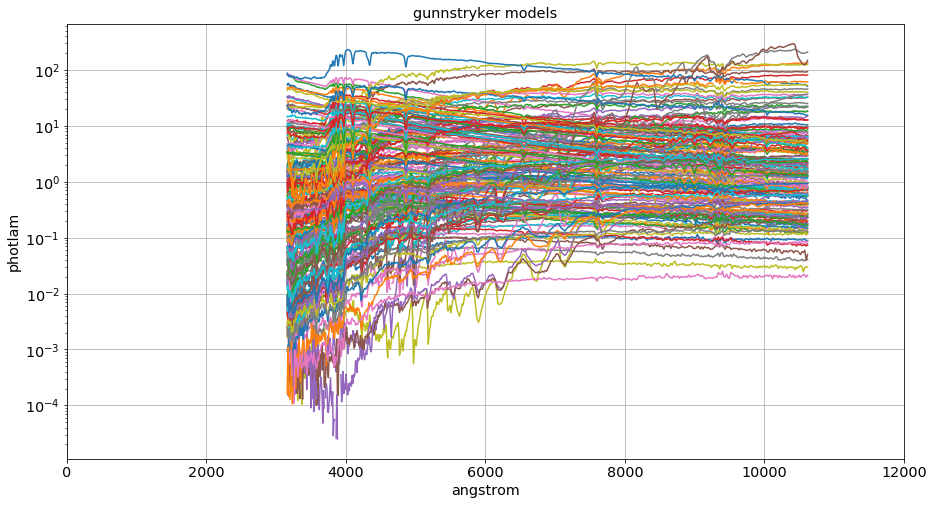

In [24]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("gunnstryker models")
    plt.savefig("gunnstryker.png")